<a href="https://colab.research.google.com/github/Aqsa-K/Text-Generation-Tensorflow-Keras/blob/master/Text_Generation_Irish_Songs_LargerData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Text Generation Using Irish Song Data

**Import Dependencies**

In [0]:
import tensorflow as tf

In [0]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import numpy as np

**Download irish songs dataset : 1692 sentences**

In [16]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/irish-lyrics-eof.txt \
    -O /tmp/irish-lyrics-eof.txt

--2019-08-30 12:30:28--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/irish-lyrics-eof.txt
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.201.128, 2607:f8b0:4001:c12::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.201.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68970 (67K) [text/plain]
Saving to: ‘/tmp/irish-lyrics-eof.txt’

/tmp/irish-lyrics-e 100%[===================>]  67.35K  --.-KB/s    in 0s      

2019-08-30 12:30:28 (174 MB/s) - ‘/tmp/irish-lyrics-eof.txt’ saved [68970/68970]



**Define Tokenizer and prepare training data**

In [17]:
tokenizer = Tokenizer()

data= open('/tmp/irish-lyrics-eof.txt').read()

corpus = data.lower().split('\n')

tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

print(tokenizer.word_index)
print(total_words)

{'the': 1, 'and': 2, 'i': 3, 'to': 4, 'a': 5, 'of': 6, 'my': 7, 'in': 8, 'me': 9, 'for': 10, 'you': 11, 'all': 12, 'was': 13, 'she': 14, 'that': 15, 'on': 16, 'with': 17, 'her': 18, 'but': 19, 'as': 20, 'when': 21, 'love': 22, 'is': 23, 'your': 24, 'it': 25, 'will': 26, 'from': 27, 'by': 28, 'they': 29, 'be': 30, 'are': 31, 'so': 32, 'he': 33, 'old': 34, 'no': 35, 'oh': 36, 'ill': 37, 'at': 38, 'one': 39, 'his': 40, 'there': 41, 'were': 42, 'heart': 43, 'down': 44, 'now': 45, 'we': 46, 'where': 47, 'young': 48, 'never': 49, 'go': 50, 'come': 51, 'then': 52, 'did': 53, 'not': 54, 'said': 55, 'away': 56, 'their': 57, 'sweet': 58, 'them': 59, 'green': 60, 'if': 61, 'take': 62, 'our': 63, 'like': 64, 'night': 65, 'day': 66, 'o': 67, 'out': 68, 'fair': 69, 'this': 70, 'town': 71, 'have': 72, 'can': 73, 'true': 74, 'its': 75, 'thou': 76, 'see': 77, 'dear': 78, 'more': 79, 'theres': 80, 'or': 81, 'had': 82, 'would': 83, 'over': 84, 'hear': 85, 'up': 86, 'ive': 87, 'through': 88, 'home': 89, '

In [22]:
input_sequences = []

for line in corpus:
  token_list = tokenizer.texts_to_sequences([line])[0]
  for i in range(1, len(token_list)):
    n_gram_sequence = token_list[:i+1]
    input_sequences.append(n_gram_sequence)

print(len(input_sequences))

#pad sequences
max_sequence_len = max([len(seq) for seq in input_sequences])

print(max_sequence_len, total_words)

input_sequences = np.array(pad_sequences(input_sequences, padding='pre', maxlen=max_sequence_len))

#create predictors and labels
xs, labels = input_sequences[:,:-1], input_sequences[:,-1]

ys = tf.keras.utils.to_categorical(labels, num_classes=total_words)


12038
16 2690


**Display sample sentence, it's corresponding training x and output y**

In [19]:


print(tokenizer.word_index['in'])
print(tokenizer.word_index['the'])
print(tokenizer.word_index['town'])
print(tokenizer.word_index['of'])
print(tokenizer.word_index['athy'])
print(tokenizer.word_index['one'])
print(tokenizer.word_index['jeremy'])
print(tokenizer.word_index['lanigan'])



8
1
71
6
713
39
1790
1791


In [25]:
print(xs[6])
print(ys[6])
print(labels[6])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 2]
[0. 0. 0. ... 0. 0. 0.]
11


In [26]:
# we can see that the index of the 1 in ys[6] is 11 which is the same as the label from labels[6]
np.argmax(ys[6])

11

**Define the Model Architecture and start training**

In [27]:
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(150)))
model.add(Dense(total_words, activation='softmax'))
adam = Adam(lr=0.01)

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 15, 100)           269000    
_________________________________________________________________
bidirectional_1 (Bidirection (None, 300)               301200    
_________________________________________________________________
dense_1 (Dense)              (None, 2690)              809690    
Total params: 1,379,890
Trainable params: 1,379,890
Non-trainable params: 0
_________________________________________________________________


In [28]:
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['acc'])
history = model.fit(xs, ys, epochs=100, verbose=1)

Epoch 1/100
12038/12038 [==============================] - 34s 3ms/sample - loss: 6.6323 - acc: 0.0758
Epoch 2/100
12038/12038 [==============================] - 33s 3ms/sample - loss: 5.6994 - acc: 0.1192
Epoch 3/100
12038/12038 [==============================] - 33s 3ms/sample - loss: 4.8296 - acc: 0.1710
Epoch 4/100
12038/12038 [==============================] - 33s 3ms/sample - loss: 3.9592 - acc: 0.2364
Epoch 5/100
12038/12038 [==============================] - 33s 3ms/sample - loss: 3.2252 - acc: 0.3258
Epoch 6/100
12038/12038 [==============================] - 33s 3ms/sample - loss: 2.6051 - acc: 0.4237
Epoch 7/100
12038/12038 [==============================] - 33s 3ms/sample - loss: 2.2739 - acc: 0.4798
Epoch 8/100
12038/12038 [==============================] - 32s 3ms/sample - loss: 1.9263 - acc: 0.5464
Epoch 9/100
12038/12038 [==============================] - 33s 3ms/sample - loss: 1.6518 - acc: 0.6078
Epoch 10/100
12038/12038 [==============================] - 32s 3ms/sampl

**Plot the accuracy graph over epochs**

In [0]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.show()



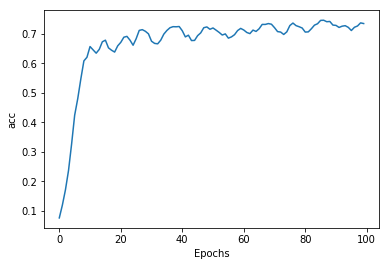

In [30]:
plot_graphs(history, 'acc')

We can see that the accuracy improves with every epoch. We train over 100 epochs and reach above 70 percent accuracy

**Generate 100 next words with an initial sample sentence**

In [0]:

def predict_next_words(seed_text, next_words):
  for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
    predicted = model.predict_classes(token_list, verbose=0)
    output_word = ""
    for word, index in tokenizer.word_index.items():
      if index == predicted:
        output_word = word
        break
    seed_text += " " + output_word

  print(seed_text)
  return seed_text

In [32]:
seed_text = "Julien twist a reel"
next_words = 100


generated_text = predict_next_words(seed_text, next_words)

Julien twist a reel and the wheel stop their barrow i cant remember there inside together ye not for im sick now forty three weeks thee they died satisfied mary kind sir do not banter she said love him marched in solace barney id to love again to shake myself to be easy thou what makes half thee writin a tower band the swell round the moons shining fair maiden by side this town to antrim town to antrim town he led them praise he hadnt them from ringlets sinking claret plying writin has taken my rapier window gone like love letters and i


In [33]:
seed_text = "Laurence went to dublin"
generated_text = predict_next_words(seed_text, next_words)

Laurence went to dublin next meeting iull hope to prove true down to the bold bold grief fell but claret dead within me mary has gone keep mine before along gray on each bough fair silver bells near will must fall to low rate today and im seldom sober say us were love love and gone and gone by and by jail and moaning and bore mary to end to lanigans ball here or assembled so along banks city where late o rosin the moaning flood ones and late o yer boot sit him down by the salley gardens molly malone apron and slower


We can see that as we move further in the predicted text, the output becomes more and more unusual. But in comparison to using smaller dataset, we can see that the output now is much better and less repetitive. So for text generation, having a good amount of data is really important. 